# Import Data and Connect to Database 



In [5]:
from mysql.connector import connection
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

dsn_database = "property" #'demographic' or 'property'
dsn_hostname = "georgetownanalyticscapstone.c50pz9jksixq.us-east-1.rds.amazonaws.com"
dsn_port = 3306
dsn_uid = "sanemkabaca"
dsn_pwd = "georgetowndmv"



db_connection = connection.MySQLConnection(user=dsn_uid, password=dsn_pwd,
                                 host=dsn_hostname,
                                 database=dsn_database)

In [6]:
query = ("""SELECT * FROM full_dataset""")

In [ ]:
df = pd.read_sql(query, con=db_connection)
df.head()


# Examining the Data

In [2]:
query1 = ("""SELECT * FROM property.property_type""")
df_type = pd.read_sql(query1, con = db_connection)

query2 = ("""SELECT * FROM property.property_address""")
df_address = pd.read_sql(query2, con = db_connection)

query3 = ("""SELECT * FROM property.property_units""")
df_units = pd.read_sql(query3, con = db_connection)

22

In [27]:
80 zip codes VA
129 zip codes in MD
22 in DC


SyntaxError: invalid syntax (<ipython-input-27-5c2457e9802f>, line 1)

## Count of Properties by State

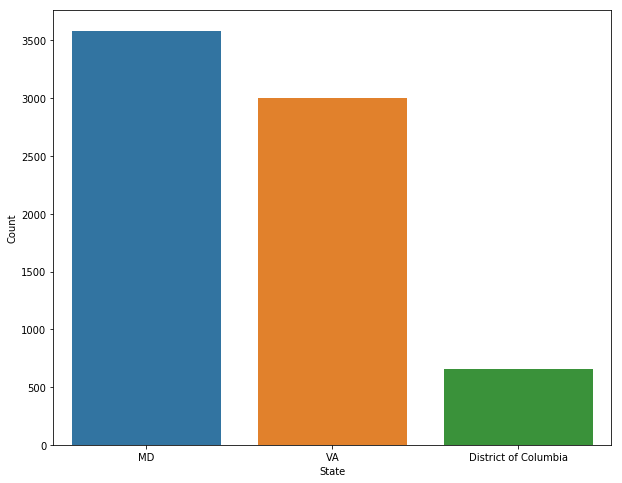

In [3]:
df_address.state = df_address.state.apply(lambda x: x.strip())
count_state = df_address.state.value_counts()

count_state = pd.DataFrame(count_state).reset_index().rename(columns = {"index":"State","state":"Count"})

plt.figure(figsize=(10, 8))
sns.barplot(x = "State", y = "Count", data = count_state)

## Count of Properties by Type

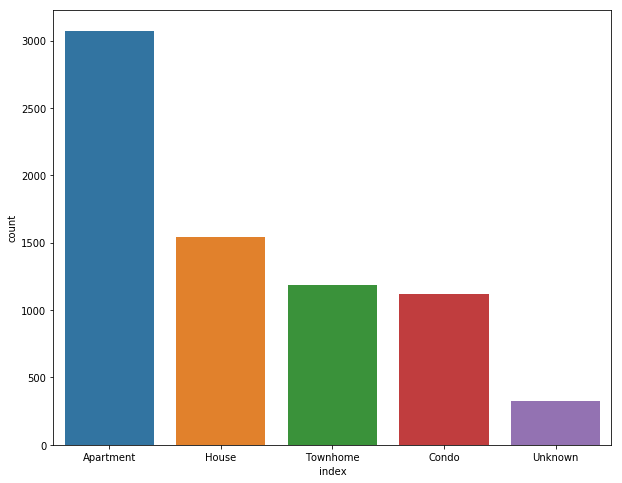

In [4]:
type_count = df_type.type.value_counts().to_frame("count").reset_index().rename({"index":"type"})

plt.figure(figsize=(10, 8))
sns.barplot(x = "index", y = "count", data = type_count)

## Count of Properties by Beds

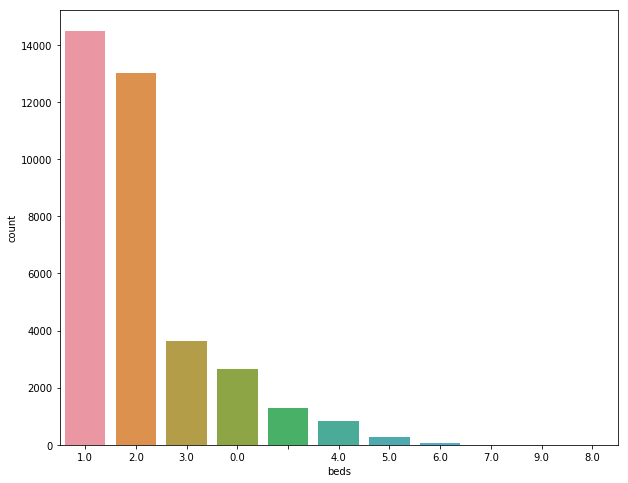

In [5]:
bed_counts = df_units.beds.value_counts().to_frame("count").reset_index()
bed_counts = bed_counts.rename(index=str, columns={"index": "beds"})

plt.figure(figsize=(10, 8))
sns.barplot(x = "beds", y = "count", data = bed_counts)

## Count of Properties by Baths

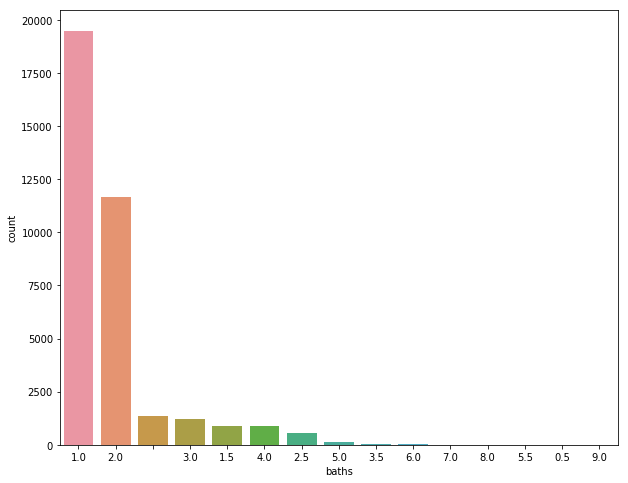

In [6]:
bath_counts = df_units.baths.value_counts().to_frame("count").reset_index()
bath_counts = bath_counts.rename(index=str, columns={"index": "baths"})

plt.figure(figsize=(10, 8))
sns.barplot(x = "baths", y = "count", data = bath_counts)

## Box Plot of Beds vs Minimum Rent

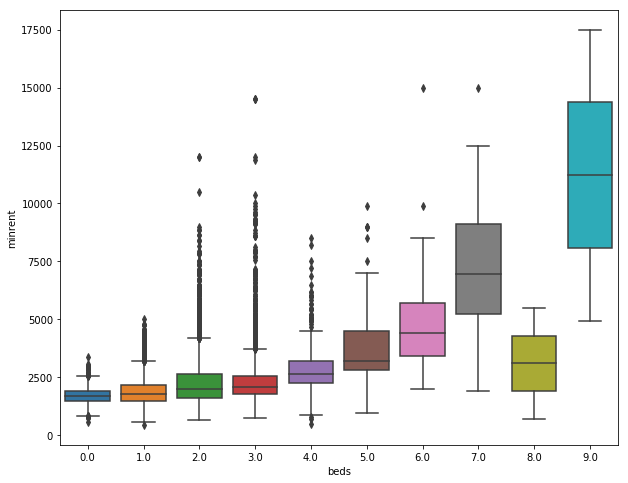

In [7]:
df_units.beds = pd.to_numeric(df_units.beds)
df_units.baths = pd.to_numeric(df_units.baths)
df_units.minrent = pd.to_numeric(df_units.minrent)
df_units.maxrent = pd.to_numeric(df_units.maxrent)
df_units.minsqft = pd.to_numeric(df_units.minsqft)
df_units.maxsqft = pd.to_numeric(df_units.maxsqft)

plt.figure(figsize=(10, 8))
sns.boxplot(x = "beds", y = "minrent", data = df_units)

## Box Plot of Beds vs Maximum Rent

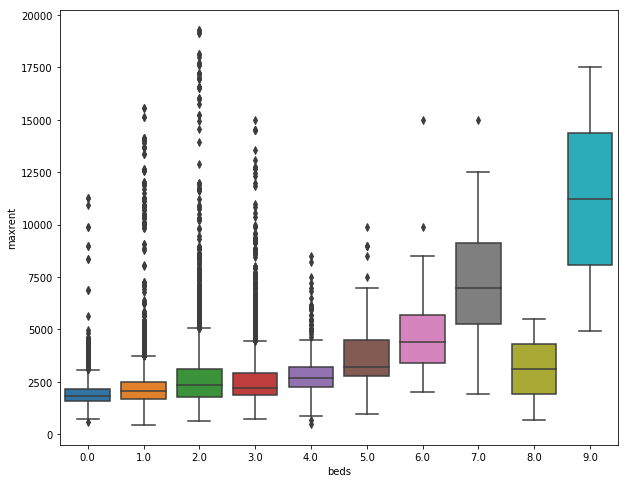

In [8]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = "beds", y = "maxrent", data = df_units)

## Box Plot of Beds vs Average Rent

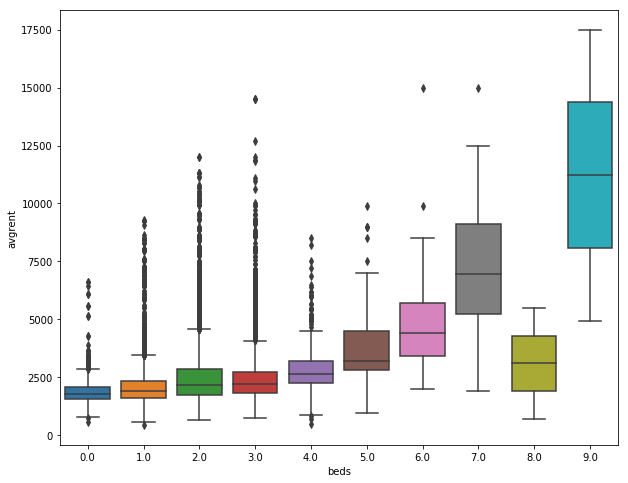

In [9]:
df_units

df_units["avgrent"] = (df_units.minrent + df_units.maxrent)/2

plt.figure(figsize=(10, 8))
sns.boxplot(x = "beds", y = "avgrent", data = df_units)

## Box Plot of State vs Average Rent

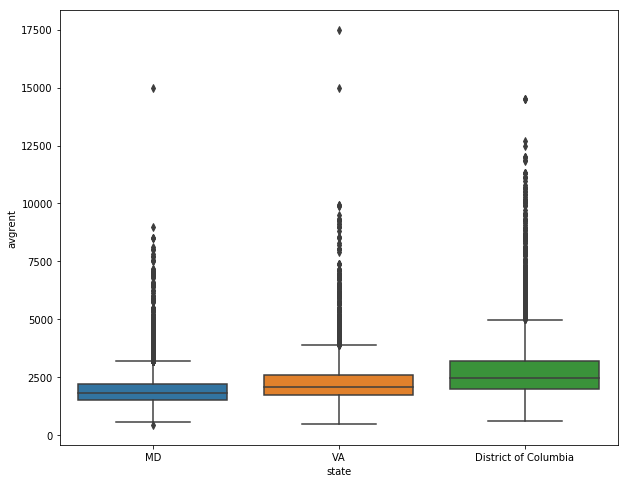

In [10]:
df_units["avgrent"] = (df_units.minrent + df_units.maxrent)/2

address_unit = df_address.join(df_units.set_index("pid"), on = "pid", how = "inner", rsuffix = "_u")

address_unit.head()
plt.figure(figsize=(10, 8))
sns.boxplot(x = "state", y = "avgrent", data = address_unit)

## Box Plot of Beds vs Minimum SqFt

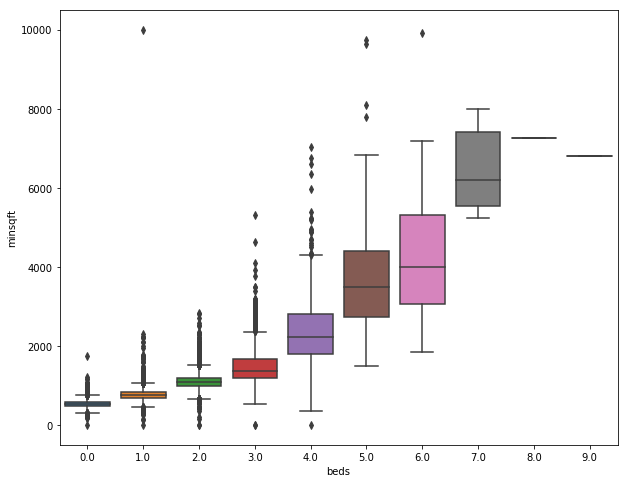

In [11]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = "beds", y = "minsqft", data = df_units)

## Box Plot of Beds vs Maximum SqFt

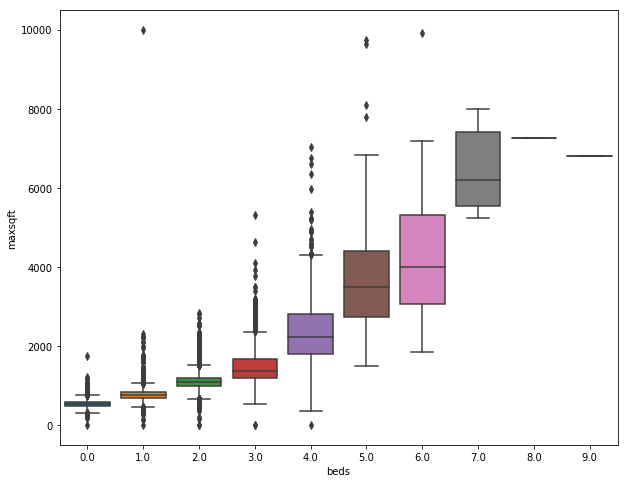

In [12]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = "beds", y = "maxsqft", data = df_units)

## Count of Bedroom-Bathroom combinations

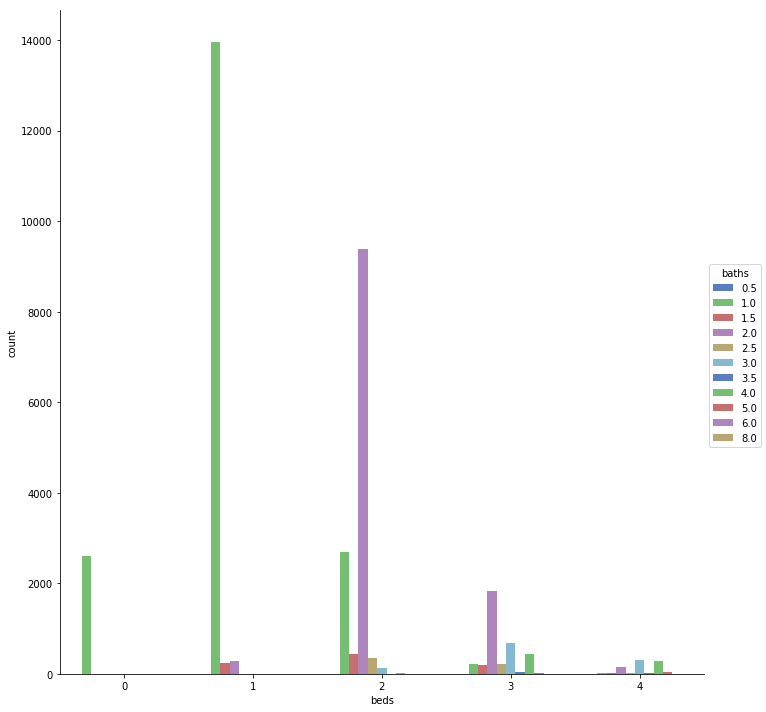

In [13]:
len(df_units.groupby(["beds", "baths"]).pid.count().to_frame().pid[9])

beds = []
baths = []
counts = []
for i in range(0, 10):
    Count = len(df_units.groupby(["beds", "baths"]).pid.count().to_frame().pid[i])
    for j in range(0, Count):
        beds.append(i)
        ba = df_units.groupby(["beds", "baths"]).pid.count().to_frame().pid[i].index[j]
        count = df_units.groupby(["beds", "baths"]).pid.count().to_frame().pid[i].to_frame().iloc[j,0]
        baths.append(ba)
        counts.append(count)

bed_bath_counts = pd.DataFrame({"beds":beds, "baths":baths, "count":counts})
bed_bath_counts = bed_bath_counts[["beds", "baths", "count"]]
bed_bath_counts


sns.factorplot(x="beds", y="count", hue="baths", data=bed_bath_counts.loc[(bed_bath_counts.beds <= 4),],
               size = 10, kind="bar", palette="muted")

# Features of each Property - How common are they?

In [14]:
query4 = ("""SELECT * FROM property.property_features""")
df_features = pd.read_sql(query4, con = db_connection)

query5 = ("""SELECT * FROM property.property_gym""")
df_gym = pd.read_sql(query5, con = db_connection)

query6 = ("""SELECT * FROM property.property_indoor_info""")
df_indoor_info = pd.read_sql(query6, con = db_connection)

query7 = ("""SELECT * FROM property.property_kitchen""")
df_kitchen = pd.read_sql(query7, con = db_connection)

query8 = ("""SELECT * FROM property.property_living_space""")
df_living_space = pd.read_sql(query8, con = db_connection)

query9 = ("""SELECT * FROM property.property_outdoor_info""")
df_outdoor_info = pd.read_sql(query9, con = db_connection)

query10 = ("""SELECT * FROM property.property_parking""")
df_parking = pd.read_sql(query10, con = db_connection)

query11 = ("""SELECT * FROM property.property_pets""")
df_pets = pd.read_sql(query11, con = db_connection)

query12 = ("""SELECT * FROM property.property_services""")
df_services = pd.read_sql(query12, con = db_connection)

### One hot encoding of property features

In [15]:
df_features.head()

,pid,ac,alarm,cableready,ceilfans,doublevanities,fireplace,framedmirror,handrail,heating,...,sprinklers,ssound,storage,trashcompact,tubshower,vacuumsys,washdry,washdryhookup,wheelchacc,wifi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,1,1,1,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
4,4,1,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## General Property Features

[(0, 1)]

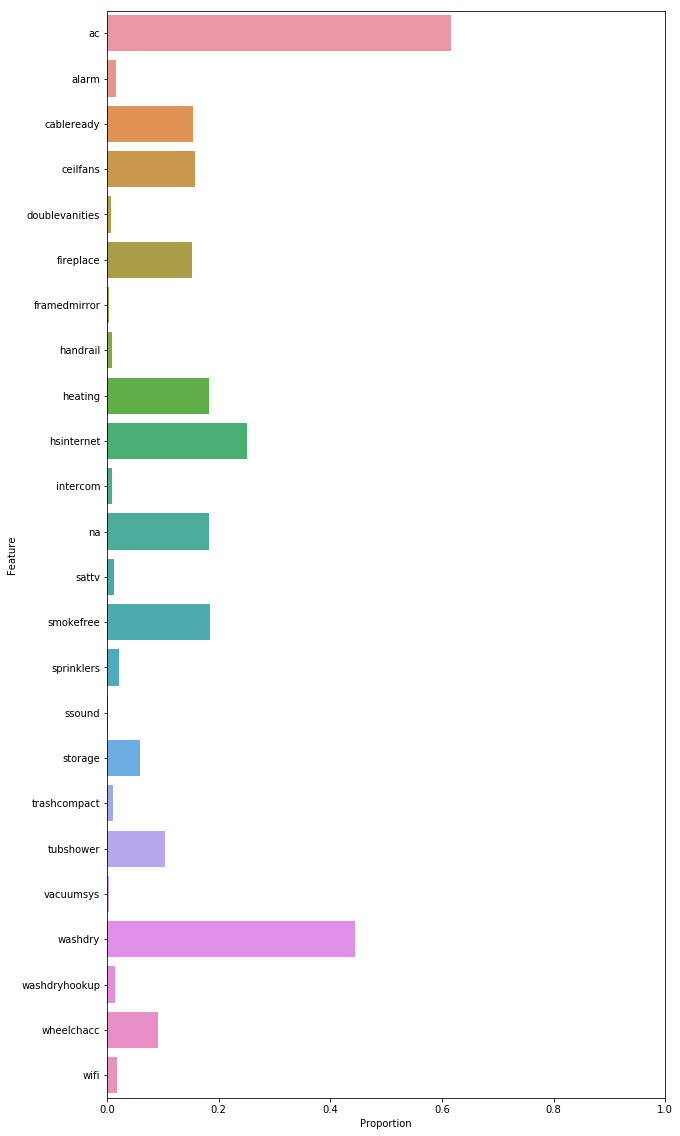

In [16]:
feature_avg = pd.DataFrame(df_features[list(df_features.columns[1:26])].mean(axis = 0)).reset_index().rename(columns = {"index":"Feature",0:"Proportion"})

plt.figure(figsize=(10, 20))
sns.barplot(y = "Feature", x = "Proportion", data = feature_avg, orient = "h", ).set(xlim = (0,1))

## Gym-Related Property Features

[(0, 1)]

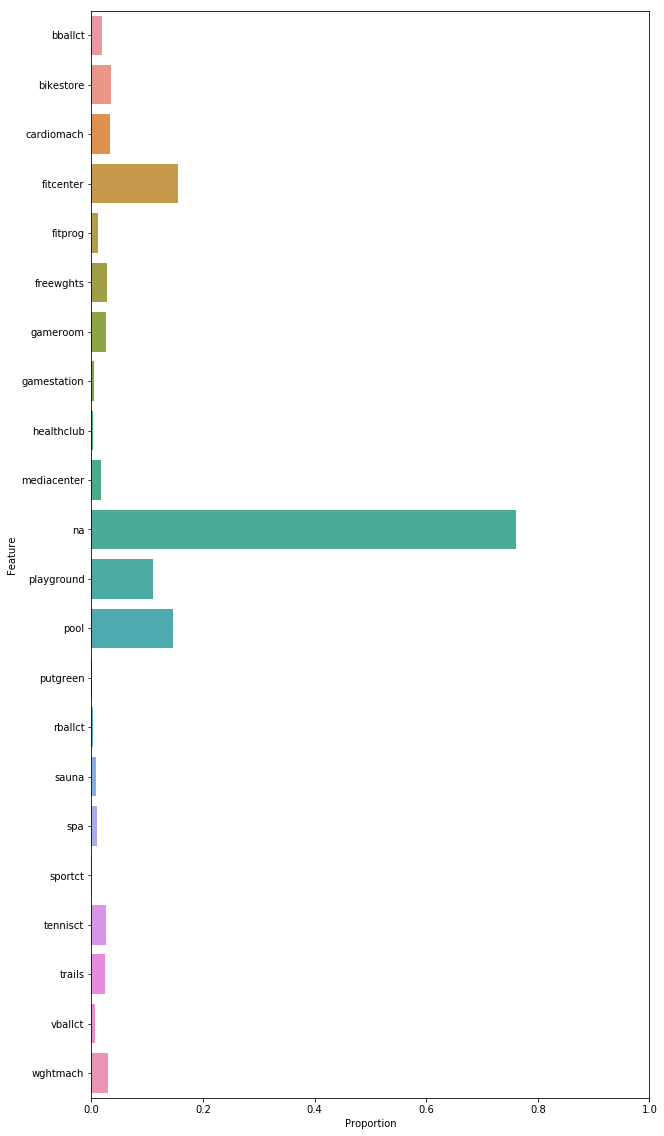

In [17]:
gym_avg = pd.DataFrame(df_gym[list(df_gym.columns[1:26])].mean(axis = 0)).reset_index().rename(columns = {"index":"Feature",0:"Proportion"})

plt.figure(figsize=(10, 20))
sns.barplot(y = "Feature", x = "Proportion", data = gym_avg, orient = "h", ).set(xlim = (0,1))

## Indoor-Related Property Features

[(0, 1)]

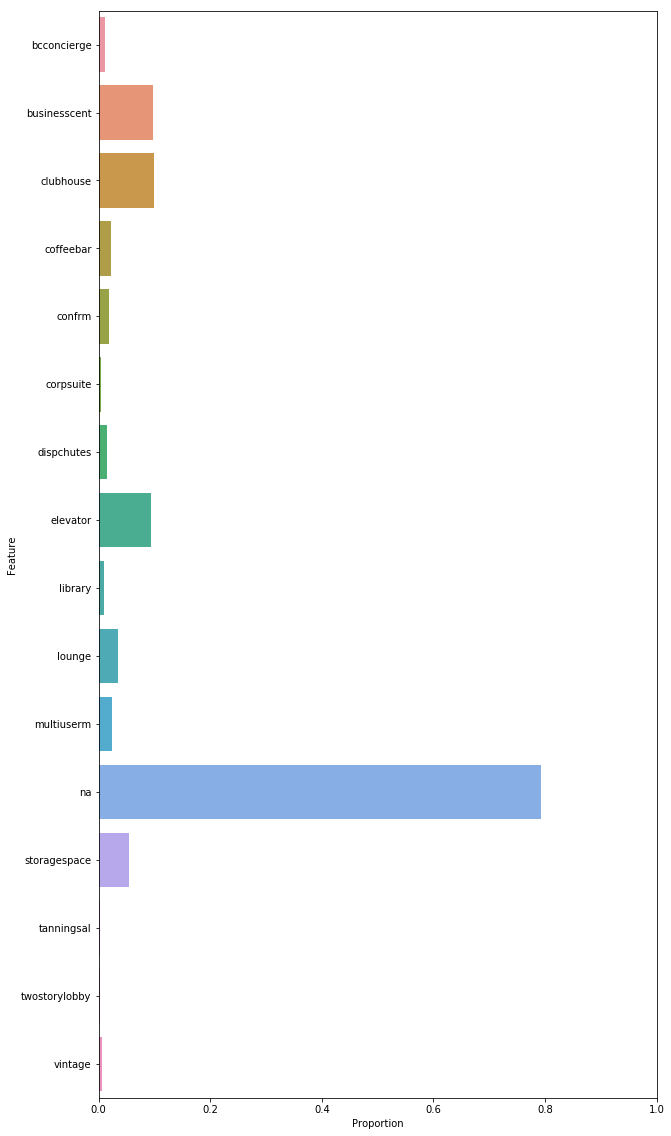

In [18]:
indoor_avg = pd.DataFrame(df_indoor_info[list(df_indoor_info.columns[1:26])].mean(axis = 0)).reset_index().rename(columns = {"index":"Feature",0:"Proportion"})

plt.figure(figsize=(10, 20))
sns.barplot(y = "Feature", x = "Proportion", data = indoor_avg, orient = "h", ).set(xlim = (0,1))

## Outdoor-Related Property Features

[(0, 1)]

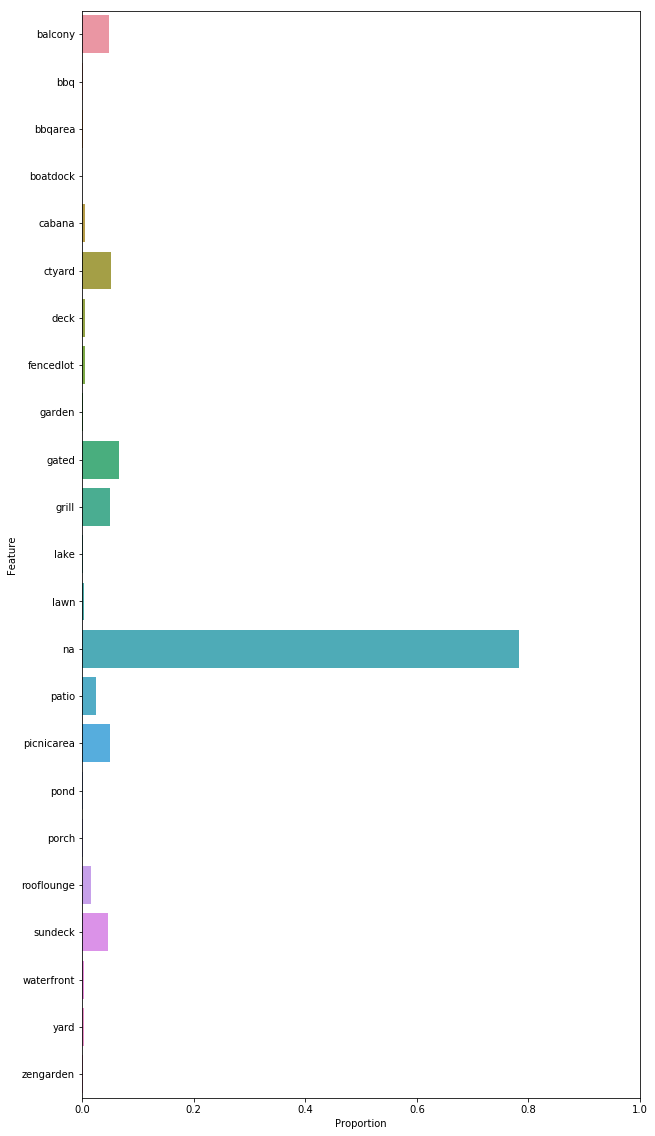

In [19]:
outdoor_avg = pd.DataFrame(df_outdoor_info[list(df_outdoor_info.columns[1:26])].mean(axis = 0)).reset_index().rename(columns = {"index":"Feature",0:"Proportion"})

plt.figure(figsize=(10, 20))
sns.barplot(y = "Feature", x = "Proportion", data = outdoor_avg, orient = "h", ).set(xlim = (0,1))

## Kitchen-Related Property Features

[(0, 1)]

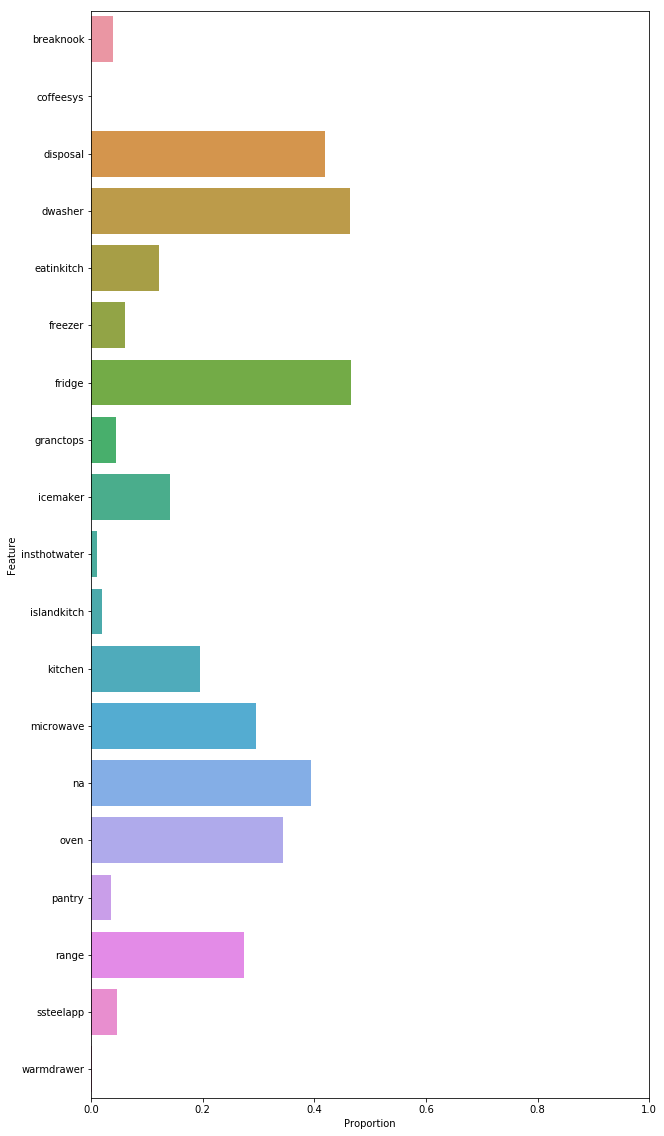

In [20]:
kitchen_avg = pd.DataFrame(df_kitchen[list(df_kitchen.columns[1:26])].mean(axis = 0)).reset_index().rename(columns = {"index":"Feature",0:"Proportion"})

plt.figure(figsize=(10, 20))
sns.barplot(y = "Feature", x = "Proportion", data = kitchen_avg, orient = "h", ).set(xlim = (0,1))

## Living Space Related Property Features

[(0, 1)]

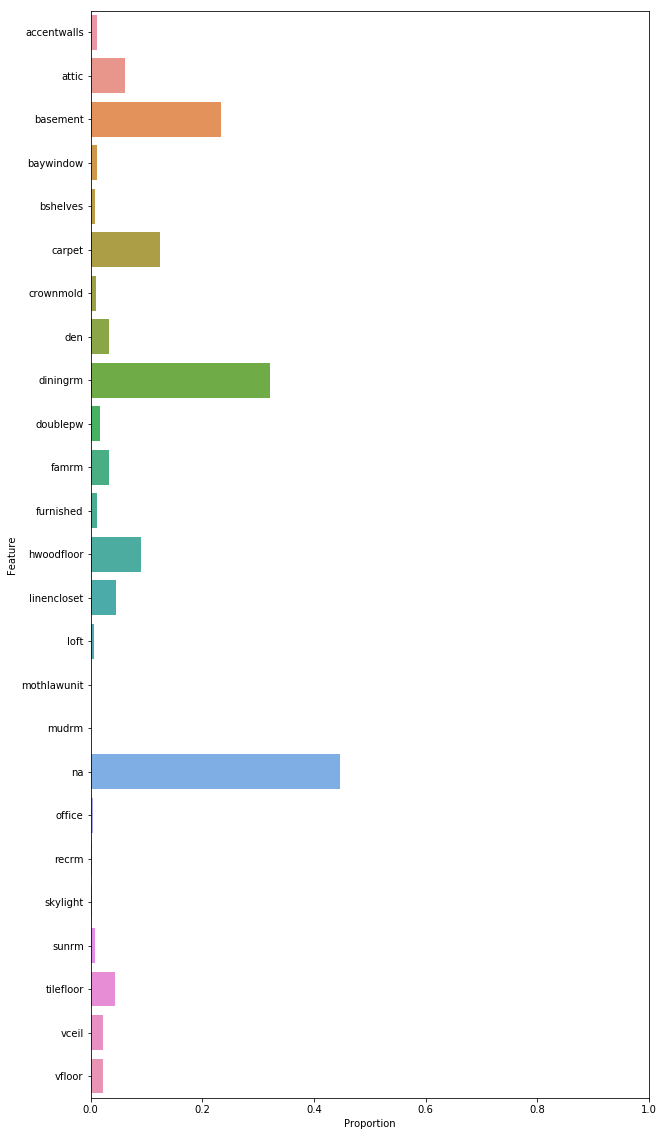

In [21]:
living_space_avg = pd.DataFrame(df_living_space[list(df_living_space.columns[1:26])].mean(axis = 0)).reset_index().rename(columns = {"index":"Feature",0:"Proportion"})

plt.figure(figsize=(10, 20))
sns.barplot(y = "Feature", x = "Proportion", data = living_space_avg, orient = "h", ).set(xlim = (0,1))

## Parking-Related Property Features

[(0, 1)]

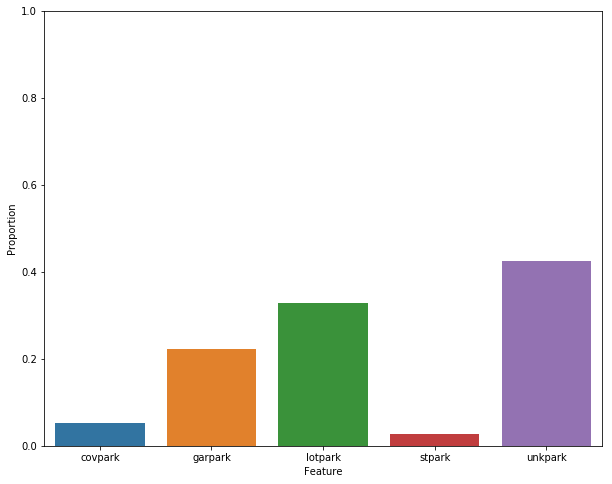

In [22]:
park_avg = pd.DataFrame(df_parking[list(df_parking.columns[1:26])].mean(axis = 0)).reset_index().rename(columns = {"index":"Feature",0:"Proportion"})

plt.figure(figsize=(10, 8))
sns.barplot(x = "Feature", y = "Proportion", data = park_avg).set(ylim = (0,1))

## Pets-Related Property Features

[(0, 1)]

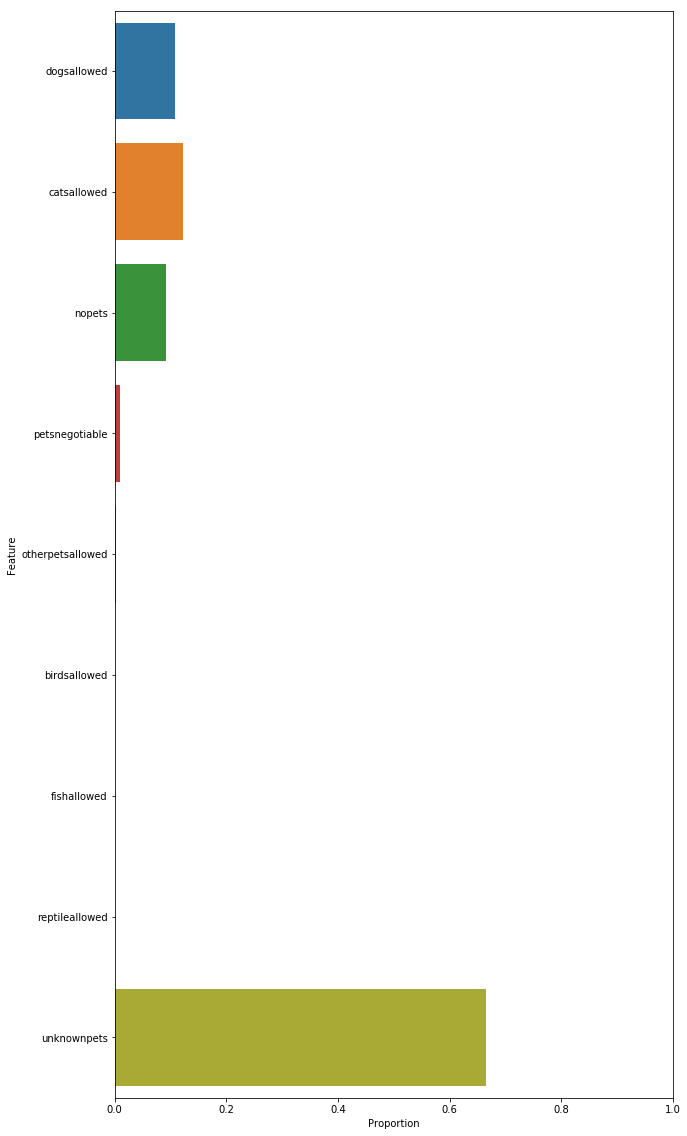

In [23]:
pets_avg = pd.DataFrame(df_pets[list(df_pets.columns[1:26])].mean(axis = 0)).reset_index().rename(columns = {"index":"Feature",0:"Proportion"})

plt.figure(figsize=(10, 20))
sns.barplot(y = "Feature", x = "Proportion", data = pets_avg, orient = "h", ).set(xlim = (0,1))

## Service-Related Property Features

[(0, 1)]

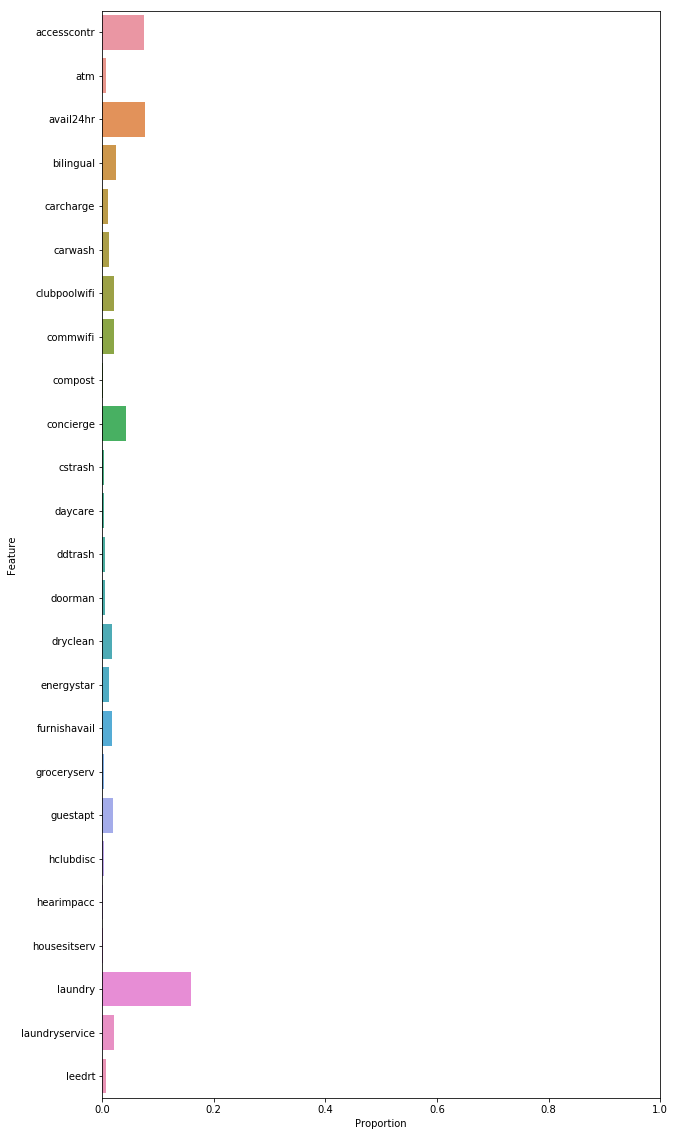

In [24]:
services_avg = pd.DataFrame(df_services[list(df_services.columns[1:26])].mean(axis = 0)).reset_index().rename(columns = {"index":"Feature",0:"Proportion"})

plt.figure(figsize=(10, 20))
sns.barplot(y = "Feature", x = "Proportion", data = services_avg, orient = "h", ).set(xlim = (0,1))

## Relationship Between Average Rent and Distance to Downtown DC?

In [25]:
query13 = ("""SELECT * FROM property.property_distance_to_dc""")
df_distance_dc = pd.read_sql(query13, con = db_connection)

In [26]:
df_distance_dc.distancetodc = pd.to_numeric(df_distance_dc.distancetodc)
distdc_unit = df_distance_dc.join(df_units.set_index("pid"), on = "pid", how = "inner", rsuffix = "_u")

distdc_unit.head()

,pid,distancetodc,beds,baths,minrent,maxrent,minsqft,maxsqft,avgrent
0,0,18.71,2.0,1.0,1300.0,1300.0,1500.0,1500.0,1300.0
1,1,17.64,4.0,5.0,3000.0,3000.0,NaN,NaN,3000.0
2,2,16.31,4.0,4.0,3000.0,3000.0,NaN,NaN,3000.0
3,3,7.63,1.0,1.0,1415.0,1470.0,725.0,725.0,1442.5
3,3,7.63,1.0,1.0,1470.0,1470.0,725.0,725.0,1470.0


[(50, 0)]

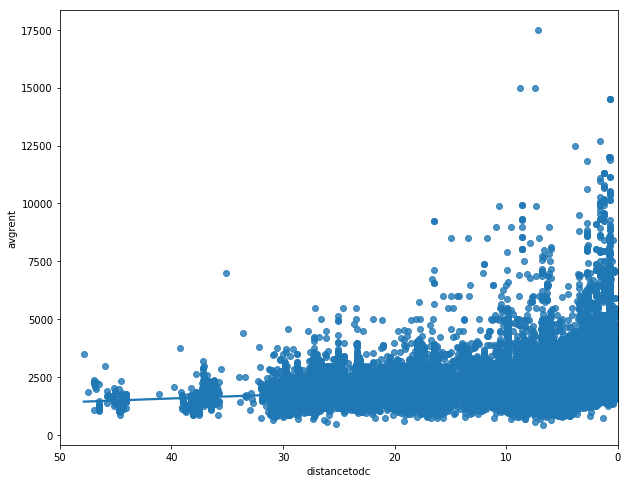

In [27]:
plt.figure(figsize=(10, 8))
sns.regplot(x = "distancetodc", y = "avgrent", data = distdc_unit, lowess = True).set(xlim = (50,0))

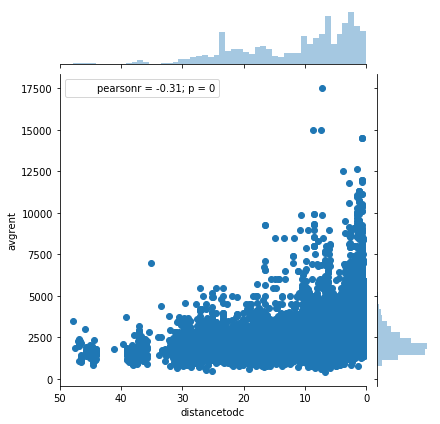

In [28]:
sns.jointplot(x = "distancetodc", y = "avgrent", data = distdc_unit, xlim = (50,0))

## Relationship Between Average Rent and Distance to Metro Station?

In [29]:
query14 = ("""SELECT * FROM property.property_unit_metro_station""")
df_metro = pd.read_sql(query14, con = db_connection)

In [30]:
df_metro.head()
df_units.head()

metro_unit = df_address.join(df_metro.set_index("pid"), on = "pid", how = "inner", rsuffix = "_u")

In [31]:
metro_unit.reset_index(drop = True, inplace = True)
metro_unit.distance = pd.to_numeric(metro_unit.distance)

NMetro = []
MinDist = []

for i in range(0, len(metro_unit)):
    Missing = pd.isnull(metro_unit.iloc[i,].distance)
    if (Missing == True):
        NMetro.append(0)
        MinDist.append(np.NaN)
    else:
        pid = metro_unit.iloc[i,].pid
        L = len(metro_unit.loc[metro_unit.pid == pid,])
        MinDist_temp = min(metro_unit.loc[metro_unit.pid == pid,].distance)
        NMetro.append(L)
        MinDist.append(MinDist_temp)
        
metro_unit["NMetro"] = NMetro
metro_unit["MinDist"] = MinDist

In [32]:
df_nmetro = metro_unit[["pid", "NMetro","MinDist"]]

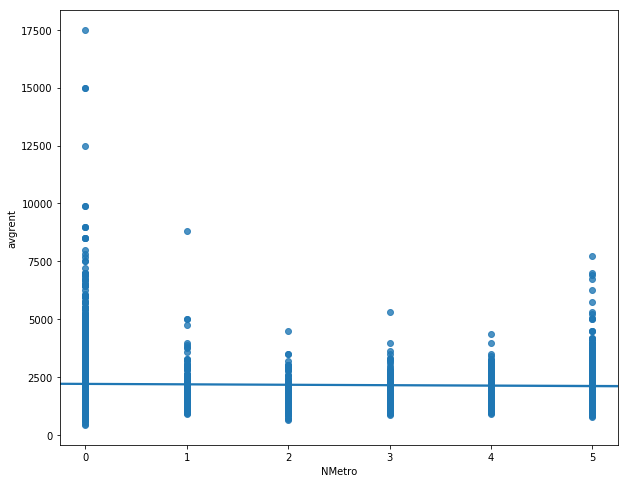

In [33]:
df_nmetro = df_nmetro.drop_duplicates(keep = "first").reset_index(drop = True)
df_nmetro2 = df_nmetro.join(df_units.set_index("pid"), on = "pid", how = "inner", rsuffix = "_u")
df_nmetro2 = df_nmetro2[["pid", "NMetro","MinDist","avgrent", "beds", "baths"]]
avg_rent_per_property = pd.DataFrame(df_nmetro2.groupby("pid").avgrent.mean()).reset_index()

df_nmetro_avg_rent = df_nmetro.join(avg_rent_per_property.set_index("pid"), on = "pid", how = "inner", rsuffix = "_avg")

plt.figure(figsize=(10, 8))
sns.regplot(x = "NMetro", y = "avgrent", data = df_nmetro_avg_rent)

[(12, 0)]

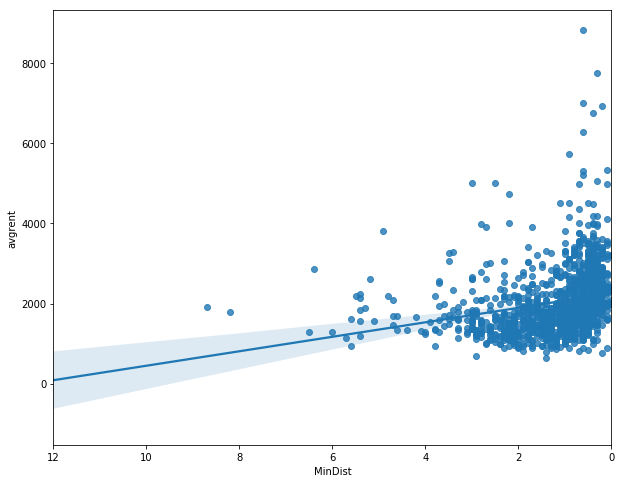

In [34]:
plt.figure(figsize=(10, 8))
sns.regplot(x = "MinDist", y = "avgrent", data = df_nmetro_avg_rent).set(xlim = (12,0))

## Distribution of Rent and Square Footage

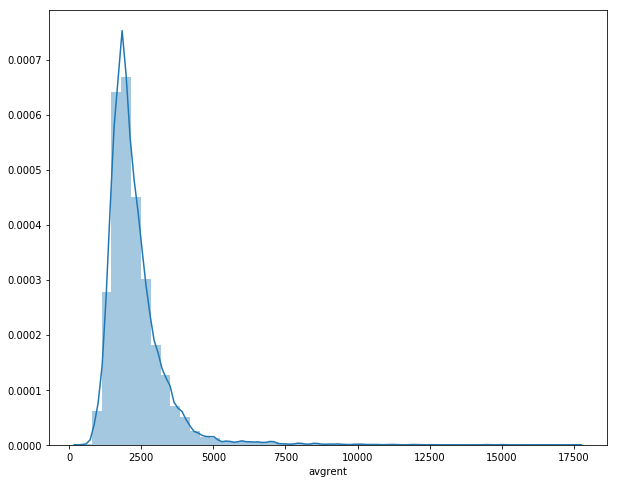

In [35]:
plt.figure(figsize=(10, 8))
sns.distplot(df_units.loc[pd.isnull(df_units.avgrent) == False,].avgrent)

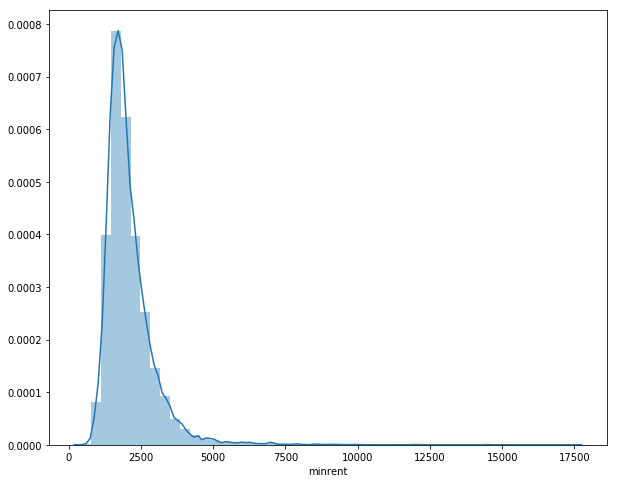

In [36]:
plt.figure(figsize=(10, 8))
sns.distplot(df_units.loc[pd.isnull(df_units.minrent) == False,].minrent)

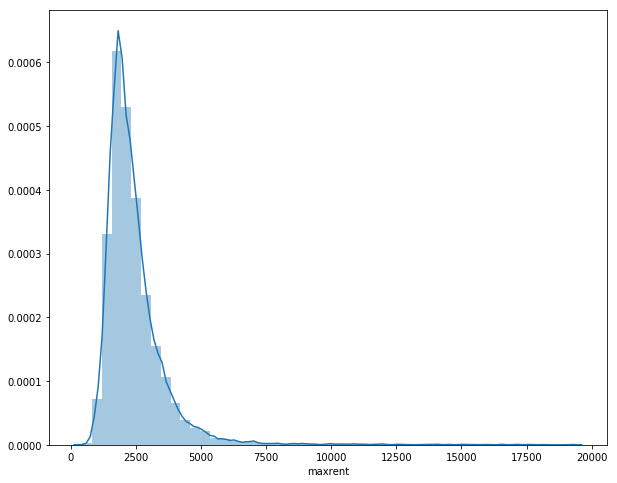

In [37]:
plt.figure(figsize=(10, 8))
sns.distplot(df_units.loc[pd.isnull(df_units.maxrent) == False,].maxrent)

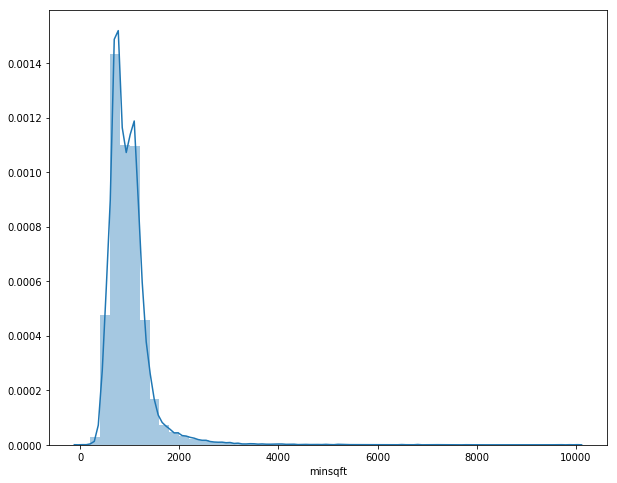

In [38]:
plt.figure(figsize=(10, 8))
sns.distplot(df_units.loc[pd.isnull(df_units.minsqft) == False,].minsqft)

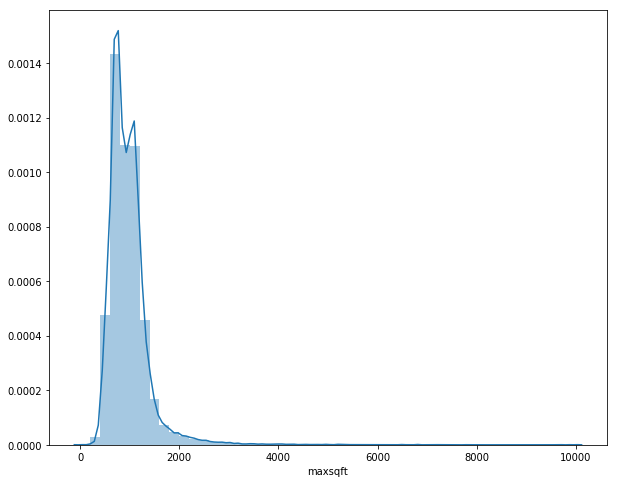

In [39]:
plt.figure(figsize=(10, 8))
sns.distplot(a = df_units.loc[pd.isnull(df_units.maxsqft) == False,].maxsqft)

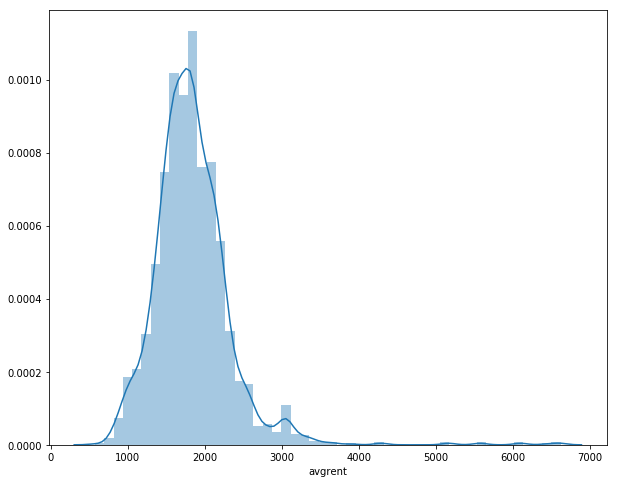

In [40]:
df_0bd = df_units.loc[df_units.beds == 0,]
df_1bd = df_units.loc[df_units.beds == 1,]
df_2bd = df_units.loc[df_units.beds == 2,]
df_3bd = df_units.loc[df_units.beds == 3,]
df_4bd = df_units.loc[df_units.beds == 4,]

plt.figure(figsize=(10, 8))
sns.distplot(a = df_0bd.loc[pd.isnull(df_0bd.avgrent) == False,].avgrent)

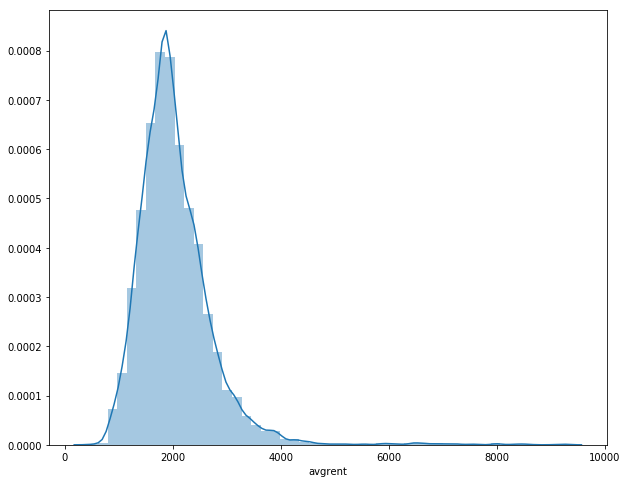

In [41]:
plt.figure(figsize=(10, 8))
sns.distplot(a = df_1bd.loc[pd.isnull(df_1bd.avgrent) == False,].avgrent)

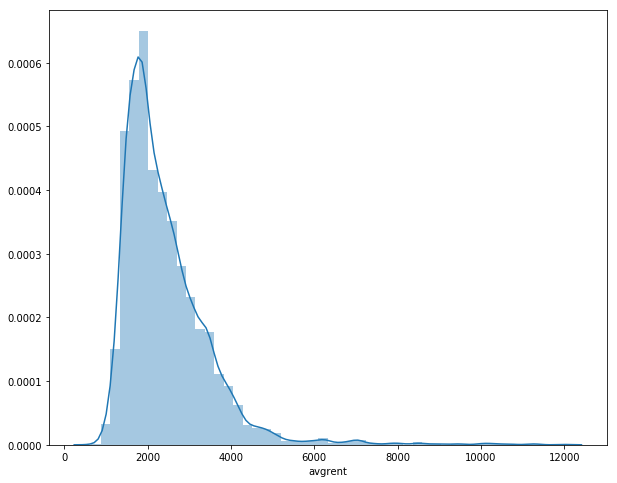

In [42]:
plt.figure(figsize=(10, 8))
sns.distplot(a = df_2bd.loc[pd.isnull(df_2bd.avgrent) == False,].avgrent)

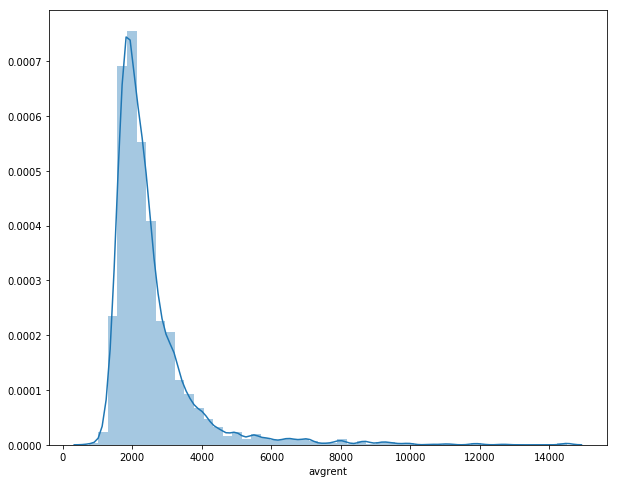

In [43]:
plt.figure(figsize=(10, 8))
sns.distplot(a = df_3bd.loc[pd.isnull(df_3bd.avgrent) == False,].avgrent)

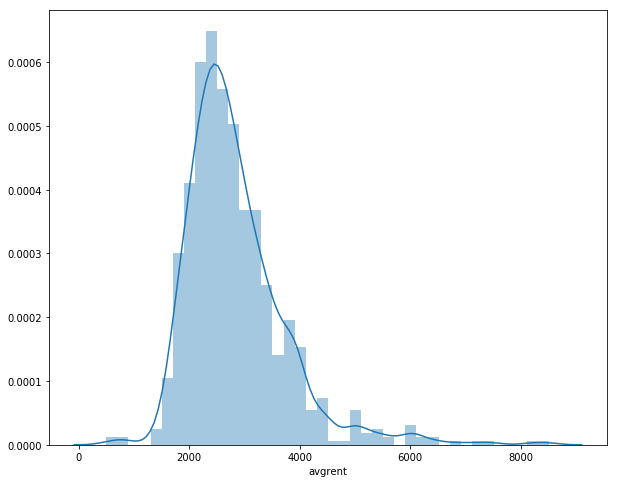

In [44]:
plt.figure(figsize=(10, 8))
sns.distplot(a = df_4bd.loc[pd.isnull(df_4bd.avgrent) == False,].avgrent)

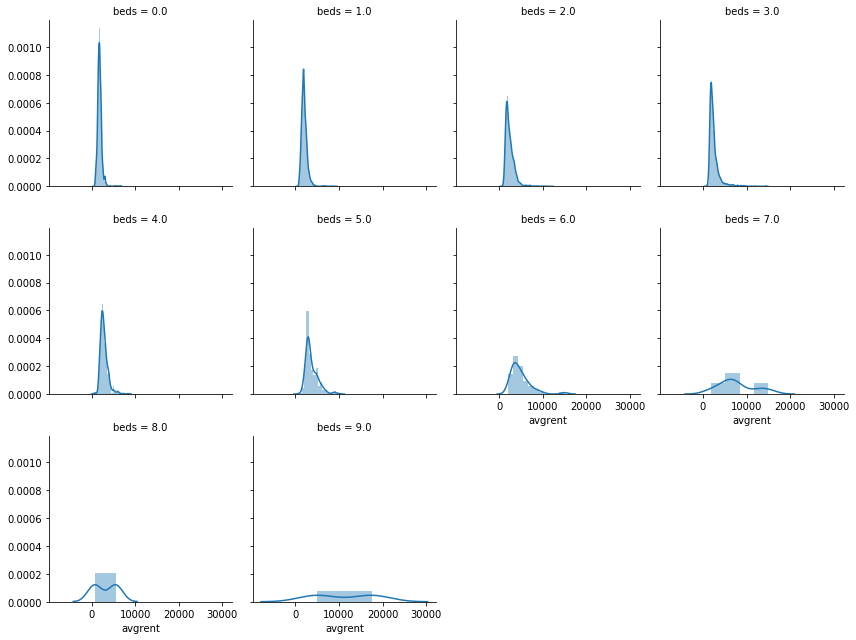

In [45]:
g = sns.FacetGrid(df_units, col="beds", col_wrap = 4, size = 3)
g = g.map(sns.distplot, "avgrent")

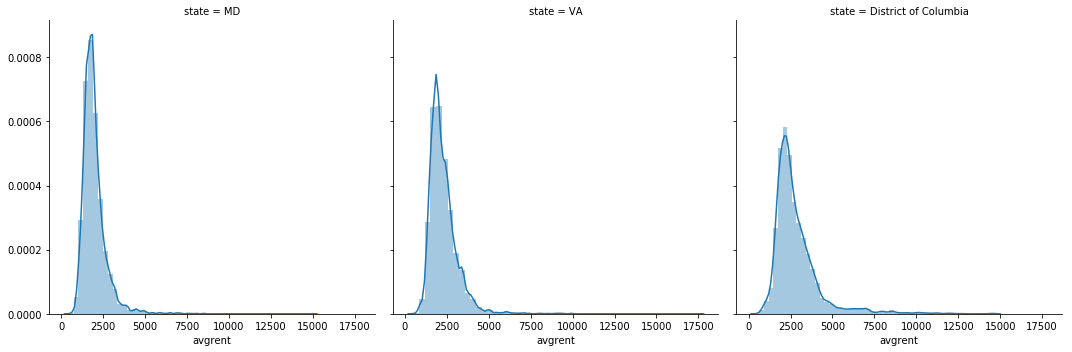

In [46]:
g = sns.FacetGrid(address_unit, col="state", col_wrap = 3, size = 5)
g = g.map(sns.distplot, "avgrent")

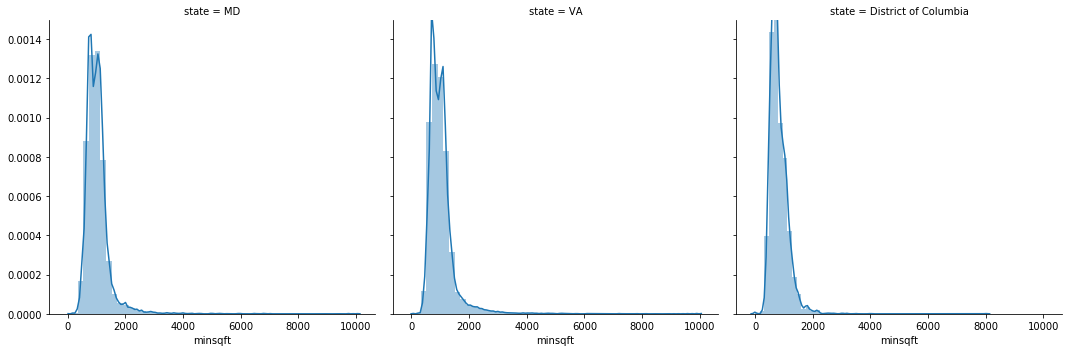

In [47]:
g = sns.FacetGrid(address_unit, col="state", col_wrap = 3, size = 5)
g = g.map(sns.distplot, "minsqft")

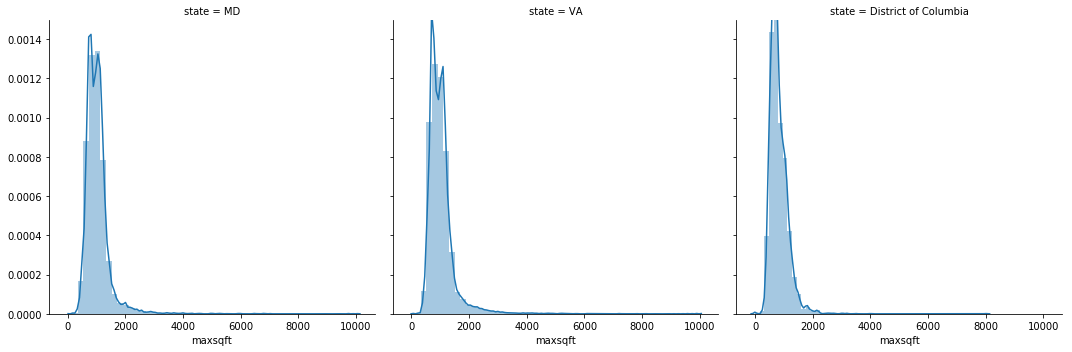

In [48]:
g = sns.FacetGrid(address_unit, col="state", col_wrap = 3, size = 5)
g = g.map(sns.distplot, "maxsqft")

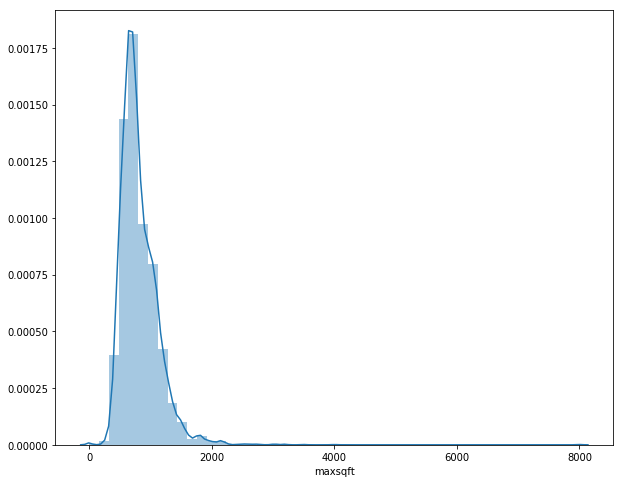

In [49]:
plt.figure(figsize=(10, 8))
sns.distplot(address_unit.loc[(address_unit.state == "District of Columbia") & 
                              (pd.isnull(address_unit.maxsqft) == False),].maxsqft)

In [53]:
query15 = ("""SELECT * FROM property.property_demographics""")
df_coord = pd.read_sql(query15, con = db_connection)

In [54]:
df_coord

,pid,nunit,yearbuilt,yearren,lotsize,nstory
0,0,,,,,
1,1,,,,0.29,
2,2,,,,0.34,
3,3,144.0,1989.0,2007.0,,4.0
4,4,299.0,1963.0,,,5.0
5,5,92.0,1997.0,,,8.0
6,6,256.0,2013.0,,,5.0
7,7,456.0,1965.0,,,3.0
8,8,684.0,1960.0,,,3.0
9,9,72.0,1965.0,2014.0,,2.0


In [57]:
max(df_coord.nstory)

'9.0'